Beware this code take time to run!

In [1]:
from modules.analytic import distance, lambda_gg
from numpy import logspace, log10, shape, zeros, nditer

z_tab=logspace(-2,log10(3),num=30)
E_save=zeros(shape(z_tab)[0])
it=nditer(E_save, op_flags=['writeonly'])

for z in z_tab:
    diff_save=1e5
    for E in logspace(1,5,num=1000):
        diff = abs(lambda_gg(E,z)[0]-distance(z)[1])     
        if diff < diff_save:
            it[0] = E
            diff_save = diff
    it.iternext()
    
print z_tab, E_save    

[ 0.01        0.01217357  0.01481958  0.01804072  0.021962    0.0267356
  0.03254677  0.03962104  0.04823295  0.05871672  0.07147921  0.08701572
  0.1059292   0.12895366  0.15698264  0.19110393  0.23264171  0.28320803
  0.34476529  0.41970246  0.51092774  0.62198149  0.75717355  0.92175056
  1.12209954  1.36599578  1.66290459  2.02434862  2.46435506  3.        ] [ 19199.20665593  17508.27031736  15966.26022101  14426.43951218
  12796.96868216  10940.54707206   8932.04599858   6836.51600451
   4771.76094894   2954.40799888   1607.70442167   1091.53593533
    835.45280584    675.81811682    562.01738481    471.70846909
    399.57803019    338.47728559    284.08836902    234.08272762
    182.49932448    161.88596902    139.6835118     117.23818033
    102.09606623     94.83681866     87.28526624     82.58799388
     92.24970053    102.09606623]


In [3]:
from numpy.random import normal
from scipy.optimize import curve_fit

def Ecut(z,E0,alpha):
    return E0*(z/1e-2)**alpha

E_approx=Ecut(z_tab,E_save[0],-1) + 0.2 * normal(size=len(z_tab))

param, pcov = curve_fit(Ecut, z_tab, E_approx)

print param

[  1.91992047e+04  -1.00002070e+00]


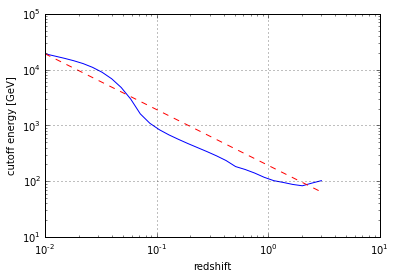

In [5]:
from matplotlib.pyplot import figure, show
%matplotlib inline
fig = figure()   
ax1 = fig.add_subplot(111)
ax1.plot(z_tab,E_save,drawstyle='-')
ax1.plot(z_tab,Ecut(z_tab,param[0],param[1]),"r--")
ax1.set_xscale('log')   
ax1.set_yscale('log')
ax1.grid(b=True,which='major')
ax1.set_xlabel("redshift")
ax1.set_ylabel("cutoff energy [GeV]")
show()

$$E_{cut}(z) \simeq 2.10^4 \left(\frac{z}{10^{-2}}\right)^{-1} \textrm{ GeV}$$ 
